In [1]:
# IMPORT YOUR LIBRARIES HERE

import pandas as pd
import numpy as np

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, AgglomerativeClustering

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from ipywidgets import interact, interact_manual

from surprise import Dataset, get_dataset_dir
from surprise.model_selection import cross_validate, GridSearchCV
from surprise import KNNBasic, KNNWithMeans, SVD
from surprise import model_selection
from surprise.model_selection import train_test_split
from surprise import accuracy
from collections import defaultdict
import io

import matplotlib.pyplot as plt

# Assignment 2

Welcome to the second assignment! 

You will have to implement clustering, association rules, and recommender systems algorithms, applying these methods to: 
- explore the similarities within groups of people watching movies (clustering analysis)
- discover the relations between movies genre (association rules)
- recommend movies to users (recommender system)

We will use the MovieLens dataset, which contains movie ratings collected from the MovieLens website by the [GroupLens](https://grouplens.org/) research lab.

Source: F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. *ACM Transactions on Interactive Intelligent Systems (TiiS)* 5, 4: 19:1–19:19. <https://doi.org/10.1145/2827872>

Once you are done you have to submit your notebook here: 
[https://moodle.epfl.ch/mod/assign/view.php?id=1247726](https://moodle.epfl.ch/mod/assign/view.php?id=1247726)

If there is need for further clarifications on the questions, after the assignment is released, we will update this file, so make sure you check the git repository for updates.

Good luck!

## Clustering analysis: similarities between people (10 points)

In this section, you will try to form clusters of individuals based on their preferences regarding movie genres. You will use a transformed version of the MovieLens dataset containing, for a selection of users:
- their average rating of all science fiction movies they rated,
- their average rating of all comedy movies they rated.

Better understanding the differences in people's tastes can help improve the design of recommender systems, for instance for the creation of the user neighborhood. Ok, let's start!

- Load the data in a dataframe. The url link is provided below. Display the first 10 observations.

In [2]:
url_clustering = 'https://raw.githubusercontent.com/mivelikikh/MGT-502-Data-Science-and-Machine-Learning/main/data/ratings_clustering.csv'

# YOUR CODE HERE

movie_ratings = pd.read_csv(url_clustering)
movie_ratings.head(10)

,avg_scifi_rating,avg_comedy_rating
0,3.50,2.71
1,2.56,2.64
2,2.00,3.20
3,3.18,2.83
4,3.00,3.90
5,2.33,3.20
6,3.00,3.63
7,2.30,3.40
8,3.11,3.39
9,2.85,2.47


- Plot a dendogram using "ward" as linkage method and "euclidean" as metric. 
- Based on the dendogram, how many clusters do you think is optimal? Briefly justify your answer.

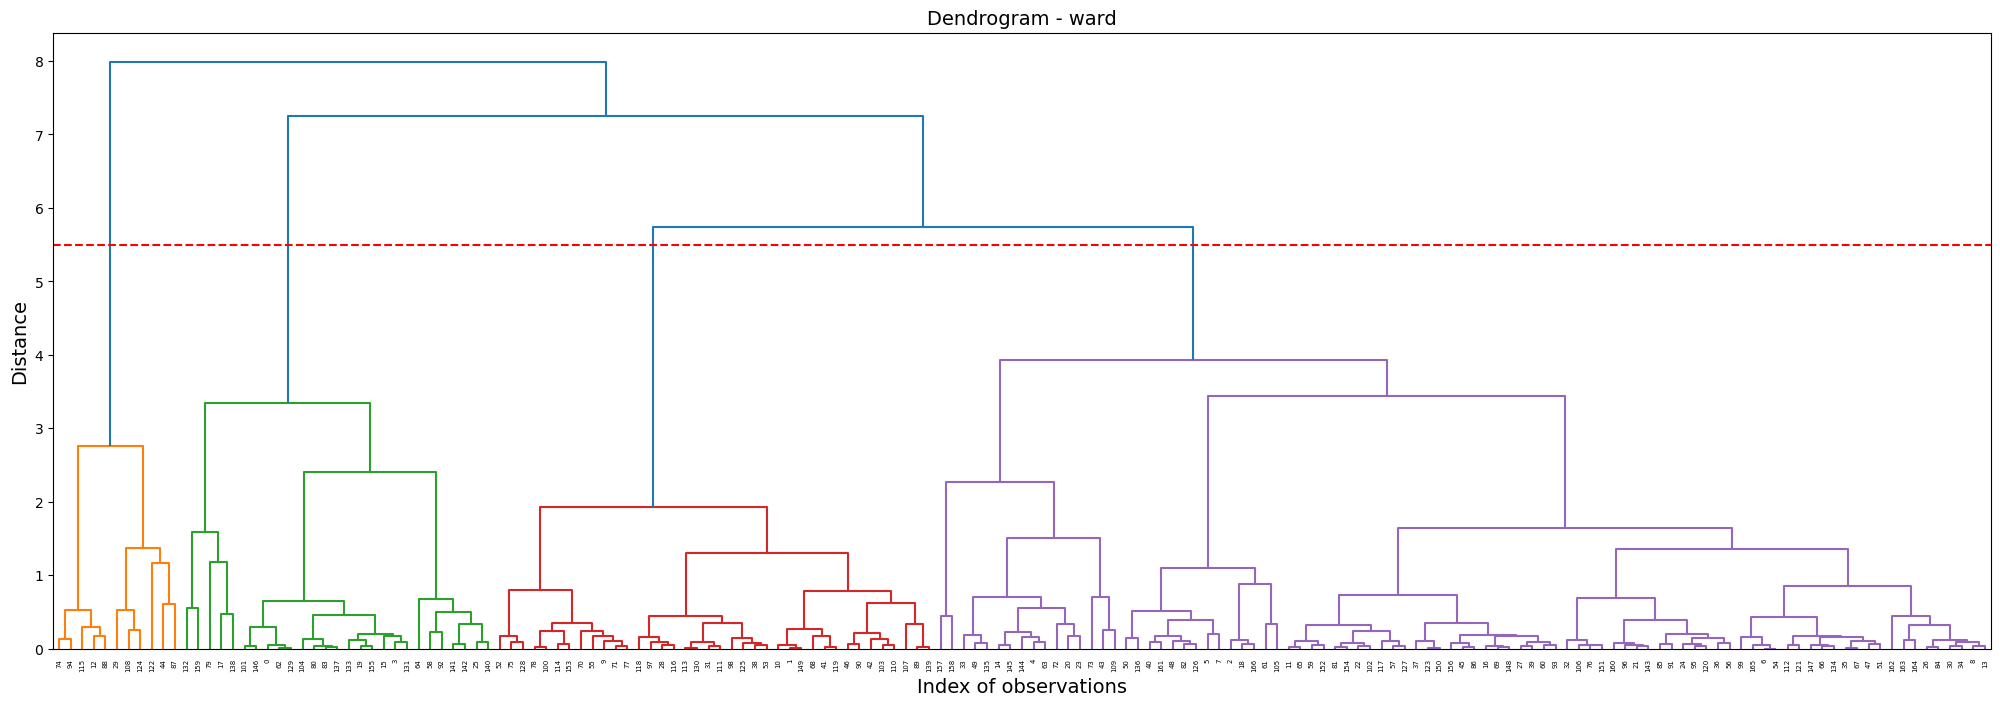

In [3]:
# YOUR CODE HERE

movie_ratings_dendogram = linkage(movie_ratings, method='ward', metric='euclidean')
plt.figure(figsize=(25, 8))
dendrogram(movie_ratings_dendogram)
plt.axhline(y=5.5, color='r', linestyle="--")
plt.title('Dendrogram - ward', fontsize=14)
plt.xlabel('Index of observations', fontsize=14)
plt.ylabel('Distance', fontsize=14)
plt.show()

<span style="color:blue"> For the second part of the question, I can use the concept of **"elbow method"**. To apply this cncept I need to follow the next steps:</span>

1. <span style="color:blue"> Find the largest vertical distance that is not intersected by any horizontal line.</span>
2. <span style="color:blue"> Draw a horizontal line (depicted with the red dashed line on the graph).</span>
3. <span style="color:blue"> Count the number of vertical lines that the horizontal line crosses.  This is the optimal number of clusters.</span>

<span style="color:blue">After doing these operations, I found out that **the optimal number of cluster is 4**.</span>

- Implement the Elbow method to determine the optimum number of cluster for K-Means algorithm (use `random_state=17` as parameter of K-Means). 
- Based on the Elbow method, how many clusters do you think is optimal? Briefly justify your answer.

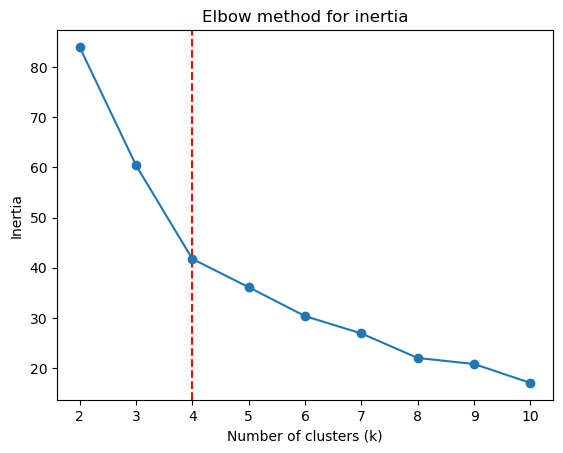

In [4]:
# YOUR CODE HERE

inertias = []
nbr_clusters = range(2,11)

for i in nbr_clusters:
    km = KMeans(n_clusters=i, random_state=17, n_init='auto').fit(movie_ratings)
    inertias.append(km.inertia_)

plt.axvline(x=4, color='r', linestyle="--")    
plt.plot(nbr_clusters, inertias, '-o')
plt.xticks(nbr_clusters)
plt.title('Elbow method for inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

> <span style="color:blue"> The elbow method tells us to select the cluster when there is a significant change in inertia (i.e., cost). In this case, 4 seems to be the optimal number of clusters. From k=5 we see that the reduction in the cost function is much lower than for example for k=3. (c) Notebook of Boris </span>

<span style="color:blue"> We could see that after 4, the slope of the graph is less steep and, basically, doesn't change significantly. That's why I would still stick with 4 as the optimal number of clusters.

- Implement (train) a K-Means algorithm with the number of clusters of your choice. Use `random_state=17` as parameter.

In [5]:
# YOUR CODE HERE

kmeans3 = KMeans(n_clusters=3, random_state=17, n_init='auto')
kmeans3.fit(movie_ratings)

KMeans(n_clusters=3, n_init='auto', random_state=17)

In [6]:
kmeans4 = KMeans(n_clusters=4, random_state=17, n_init='auto')
kmeans4.fit(movie_ratings)

KMeans(n_clusters=4, n_init='auto', random_state=17)

In [7]:
kmeans5 = KMeans(n_clusters=5, random_state=17, n_init='auto')
kmeans5.fit(movie_ratings)

KMeans(n_clusters=5, n_init='auto', random_state=17)

In [8]:
kmeans6 = KMeans(n_clusters=6, random_state=17, n_init='auto')
kmeans6.fit(movie_ratings)

KMeans(n_clusters=6, n_init='auto', random_state=17)

In [9]:
inertia3 = round(kmeans3.inertia_, 2)
inertia4 = round(kmeans4.inertia_, 2)
inertia5 = round(kmeans5.inertia_, 2)
inertia6 = round(kmeans6.inertia_, 2)

In [10]:
print(f"The inertia of the K-Means model with 3 clusters is: {inertia3}")
print(f"The inertia of the K-Means model with 4 clusters is: {inertia4}")
print(f"The inertia of the K-Means model with 5 clusters is: {inertia5}")
print(f"The inertia of the K-Means model with 6 clusters is: {inertia6}")

The inertia of the K-Means model with 3 clusters is: 60.45
The inertia of the K-Means model with 4 clusters is: 41.75
The inertia of the K-Means model with 5 clusters is: 36.11
The inertia of the K-Means model with 6 clusters is: 30.34


In [11]:
print("The 'costs' of movingt from:")
print(f"3 -> 4 clusters: {inertia3 - inertia4}")
print(f"4 -> 5 clusters: {inertia4 - inertia5}")
print(f"5 -> 6 clusters: {inertia5 - inertia6}")

The 'costs' of movingt from:
3 -> 4 clusters: 18.700000000000003
4 -> 5 clusters: 5.640000000000001
5 -> 6 clusters: 5.77


<span style="color:blue"> Inertia = the sum of squared distances of samples to their closest cluster center. This is the cost function that the algorithm minimizes. We use this metric because in the general case we do not have the target variable (unsupervised learning), so we cannot rely on the metrics used in classification such as the accuracy.

<span style="color:blue"> Indeed, using the "costs" privided above (basically, the inertia changes we need to accept moving from one number of cluster to another), we can see that **4 cluster should be cobsidered as the optimal number, since the step from 4 to 5 cluster provides the smallest inertia change**.

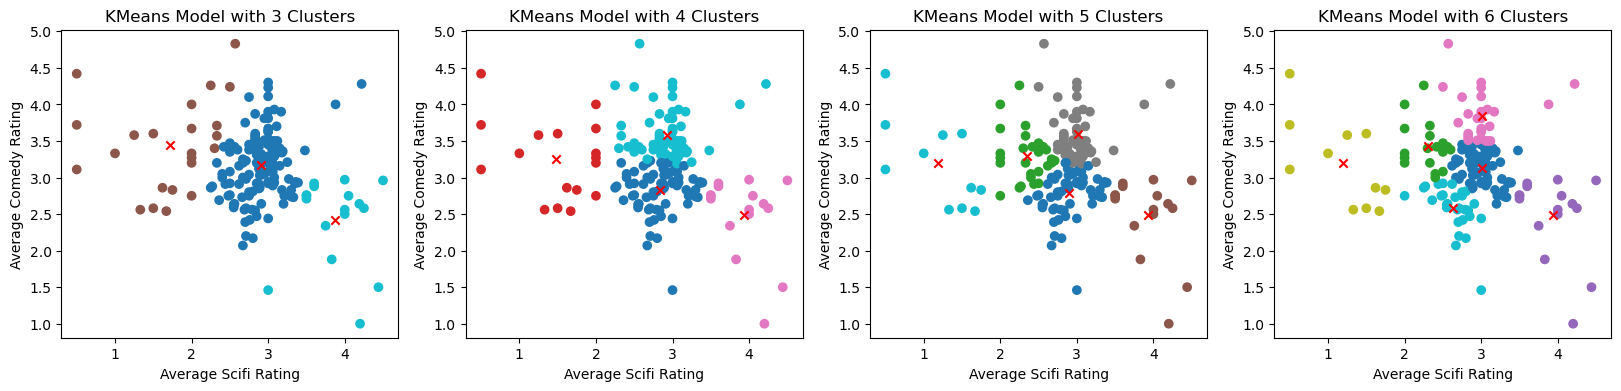

In [12]:
kmeans_models = [kmeans3, kmeans4, kmeans5, kmeans6]

fig, ax = plt.subplots(1, 4, figsize=(20, 4))

for i, model in enumerate(kmeans_models):
    ax[i].scatter(movie_ratings["avg_scifi_rating"], 
                  movie_ratings["avg_comedy_rating"], 
                  c=model.labels_, cmap='tab10')
    ax[i].scatter(model.cluster_centers_[:, 0],
                  model.cluster_centers_[:, 1],
                  c="red", 
                  marker='x')
    ax[i].set_xlabel("Average Scifi Rating")
    ax[i].set_ylabel("Average Comedy Rating")
    ax[i].set_title(f"KMeans Model with {i+3} Clusters")

<span style="color:blue"> To pick the right model we need to know the optimal number of cluster. Intuitively, the higher the number of clusters we fit the model, the better it explains the variation. However, this will at some point result in over-fitting, with only minimal gains in the performance (it can be seen in the graph of Elbow method for inertia above).

- Implement (train) a hierarchical algorithm with the same number of clusters as for the K-Means model. Use "ward" as linkage method and "euclidean" as metric/affinity 

In [13]:
agglomerative3 = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agglomerative3.fit(movie_ratings)

AgglomerativeClustering(metric='euclidean', n_clusters=3)

In [14]:
agglomerative4 = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
agglomerative4.fit(movie_ratings)

AgglomerativeClustering(metric='euclidean', n_clusters=4)

In [15]:
agglomerative5 = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
agglomerative5.fit(movie_ratings)

AgglomerativeClustering(metric='euclidean', n_clusters=5)

In [16]:
agglomerative6 = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
agglomerative6.fit(movie_ratings)

AgglomerativeClustering(metric='euclidean', n_clusters=6)

- Create a figure consisting of two subplots:
    - a scatterplot of 'avg_scifi_rating' and 'avg_comedy_rating' colored by the clusters predicted with your KMeans model. Add the cluster centers to your plot. Label your clusters with the name of your choice (e.g., "Comedy aficionado").
    - a scatterplot of 'avg_scifi_rating' and 'avg_comedy_rating' colored by the clusters predicted with your hierarchical algorithm model. Label your clusters with the name of your choice.
- How do your models compare?

<span style="color:blue"> In this part I would stick with the `n_clusters=4` as it was justified above.

In [17]:
agglomerative4_labels = agglomerative4.fit_predict(movie_ratings)

cluster_centers = []
for i in np.unique(agglomerative4_labels):
    cluster_centers.append(np.mean(movie_ratings[agglomerative4_labels == i], axis=0))

In [18]:
kmeans_cluster_labels = ['Equal fan of both', 'Comedy fan', 'Scifi fan', 'Likes comedy a bit more']
agglomerative_cluster_labels = ['Likes comedy a bit more', 'Comedy fan', 'Scifi fan', 'Equal fan of both']
labels = [kmeans_cluster_labels, agglomerative_cluster_labels]

models = [kmeans4, agglomerative4]
models_names = ["KMeans", "Hierarchical"]

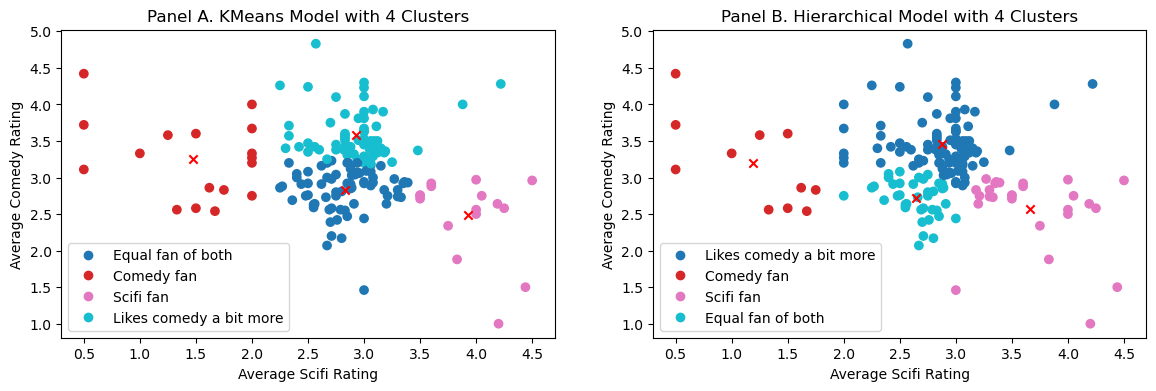

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

for j, model in enumerate(models):
    scatter = ax[j].scatter(movie_ratings["avg_scifi_rating"], 
                            movie_ratings["avg_comedy_rating"], 
                            c=model.labels_, 
                            cmap='tab10', 
                            label=labels[j])
    
    if model == agglomerative4:
        for k in range(len(cluster_centers)):
            ax[j].scatter(cluster_centers[k][0], cluster_centers[k][1], c="red", marker='x')
    else:
        ax[j].scatter(model.cluster_centers_[:, 0],
                      model.cluster_centers_[:, 1],
                      c="red", 
                      marker='x')
        
    ax[j].set_xlabel("Average Scifi Rating")
    ax[j].set_ylabel("Average Comedy Rating")
    ax[j].set_title(f"Panel {chr(65+j)}. {models_names[j]} Model with 4 Clusters")
    ax[j].legend(handles=scatter.legend_elements()[0], labels=labels[j])

<span style="color:blue"> In the KMeans model, there are more Comedy fans (red dots on both Panels), and Equal fan of both (dark blue dots on the Panel A but light blue ones on the Panel B), comparing to the Hierarchical model. At the same time, Hierarchical model assign more people to the clusters of Scifi fan (pink dots on both panels), and Likes comedy a bit more (dark blue dots on the Panel B but light blue one on the Panel A).
    
<span style="color:blue"> Another thing, how different models assign colors to the different labels. We can notice that blue shades do not represent the same clusters on both panels. The possible explanation is: ????????????????

## Association Rules: association between movie genres (10 points)

You will now pursue your analysis, but this time trying to dig out information about movies. More precisely, you will search for matches between film genres using association rules. We try to understand, for instance, how likely it is that a film is both drama and action. This information can be interesting for film producers who may either want to produce something similar to the established norm: if most drama films are also action, perhaps the new action-drama film would be equally appreciated, or quite to the contrary try a new combination of genres which is more rare to find.

- Load the data in a dataframe. The url link is provided below. 
- Display the first 10 observations. 
- Print the unique values of genres from the first column. 
- How many unique genres does the first column contain? 
- How many movies does the dataframe contains?

In [20]:
url_association_rules = 'https://raw.githubusercontent.com/michalis0/MGT-502-Data-Science-and-Machine-Learning/main/data/movies_assoc_rules.csv'

# YOUR CODE HERE

movies = pd.read_csv(url_association_rules)
movies.head(10)

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,NaN,NaN,NaN,NaN,NaN
1,Adventure,Children,Fantasy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Comedy,Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Comedy,Drama,Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Action,Crime,Thriller,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Comedy,Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Adventure,Children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Action,Adventure,Thriller,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# YOUR CODE HERE

first_column_genres = movies.iloc[:,0].unique()
number_of_movies = movies.shape[0]

print("The 1st column has the following {len(first_column_genres)} unique genres:")
print(first_column_genres)
print()
print(f"The dataframe contains {number_of_movies} films in the whole dataset")

The 1st column has the following {len(first_column_genres)} unique genres:
['Adventure' 'Comedy' 'Action' 'Drama' 'Crime' 'Children' 'Mystery'
 'Documentary' 'Animation' 'Thriller' 'Horror' 'Fantasy' 'Western'
 'Film-Noir' 'Romance' 'War' 'Sci-Fi' 'Musical' 'IMAX']

The dataframe contains 27032 films in the whole dataset


- Preprocessing: as seen during the lab, convert the dataset using a `Transaction Encoder` from the `mlextend` module so that the dataset is reorganised in columns of unique genres. Rows should contain only True or False boolean values according to whether a film was considered as belonging to a genre column or not. Check that you have the correct dimensions.

In [22]:
# YOUR CODE HERE

movies_list = movies.values.tolist()

movies_list_cleaned = [[x for x in y if str(x) != 'nan'] for y in movies_list]

transaction_encoder = TransactionEncoder()
movies_list_encoded = transaction_encoder.fit(movies_list_cleaned).transform(movies_list_cleaned)

movies_encoded = pd.DataFrame(movies_list_encoded, columns=transaction_encoder.columns_)
movies_encoded

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,False,True,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27027,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
27028,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27029,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27030,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
movies_encoded.shape

(27032, 19)

- Frequent itemsets: using the Apriori algorithm to find the frequent itemsets with minimum support of 0.01. There is no condition on the maximum length of an itemset. 
- How many itemsets did the apriori algorithm return above (for min_support=0.01)? 
- What are the 10 itemsets with the largest support (you can directly display a dataframe with the 10 itemsets and their support)?

In [24]:
# YOUR CODE HERE

min_support = 0.01

freq_items = apriori(movies_encoded, min_support=min_support, use_colnames=True)

print("The 10 itemsets with the largest support:")
freq_items.sort_values(by='support', ascending=False).head(10)

The 10 itemsets with the largest support:


,support,itemsets
7,0.493637,(Drama)
4,0.309781,(Comedy)
15,0.154558,(Thriller)
13,0.152671,(Romance)
0,0.130216,(Action)
5,0.108723,(Crime)
10,0.096589,(Horror)
53,0.095183,"(Drama, Romance)"
39,0.094185,"(Drama, Comedy)"
6,0.091410,(Documentary)


In [25]:
print(f"Apriori algorithm returns {freq_items.shape[0]} itemsets that have min_support above {min_support}")

Apriori algorithm returns 69 itemsets that have min_support above 0.01


<span style="color:blue"> For itemsets with a minimum support > 0.01 the apriori algorithm finds 69 different results. The 10 itemsets with the largest support are in the table above

- Mining for association rules: using the frequent items identified above, find association rules with a minimum confidence of 0.45 and order them by decreasing value of lift.
- Discuss the following statements (true or false with 1-2 lines justification)
    - Animation films are associated with Children.  
    - If a film has the genre Musical, then it is also a Comedy.
    - If War then Drama is the asociation rule with the highest confidence.  

In [26]:
# YOUR CODE HERE

metrics = ['lift', 'confidence']
thresholds = [0.8, 0.7, 0.6, 0.5, 0.4]

rules_interactive = association_rules(freq_items, metric="confidence", min_threshold=0.45)
rules_interactive.sort_values(by="lift", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Animation),(Children),0.037992,0.042135,0.017387,0.457644,10.861301,0.015786,1.766117
8,(Mystery),(Thriller),0.056008,0.154558,0.029410,0.525099,3.397434,0.020753,1.780250
9,"(Action, Crime)",(Thriller),0.028374,0.154558,0.014612,0.514993,3.332050,0.010227,1.743157
11,"(Drama, Mystery)",(Thriller),0.026672,0.154558,0.012800,0.479889,3.104921,0.008677,1.625504
2,(Musical),(Comedy),0.038325,0.309781,0.018238,0.475869,1.536146,0.006365,1.316882
7,(War),(Drama),0.044170,0.493637,0.033072,0.748744,1.516790,0.011268,2.015324
1,(Children),(Comedy),0.042135,0.309781,0.019458,0.461809,1.490758,0.006406,1.282479
3,(Romance),(Comedy),0.152671,0.309781,0.070102,0.459171,1.482245,0.022808,1.276225
6,(Romance),(Drama),0.152671,0.493637,0.095183,0.623455,1.262983,0.019819,1.344762
4,(Crime),(Drama),0.108723,0.493637,0.063332,0.582511,1.180039,0.009663,1.212877


*Discuss statements here* 

<span style="color:blue">Based on the constructed association rules:</span>

1. <span style="color:blue"> **True**. The association rule between Animation and Children has a high confidence of 0.458 (45.76%) and a high lift of 10.861. In turn, it means that the correlation between these two genres is highly likely not due to a chance but a certain reason. In fact, it makes sense, since most of cartoons (= animation movies) are produced for children </span>
2. <span style="color:blue"> **False**. While the association rule between Musical and Comedy has a high confidence of 0.476 (47.59%), the lift is only 1.536. Based on lift values we can't be sure about the strong association rule between these 2 genres. We need to do a causality analysis to be sure that if a film is Musical, then it is also a Comedy. </span>
3. <span style="color:blue"> **True**. The association rule between War and Drama has a confidence of 0.749, which is the highest in the table. </span>

## Recommender systems: item-based recommender system (10 points)

In the walkthrough, we have implemented a user-to-user collaborative filtering algorithm (from scratch and using using Surprise library), i.e., our recommendations were based on the ratings of users with similar tastes. In this assignment, you will implement an **item-to-item** collaborative filtering algorithm, i.e., the recommendations will be based on the set of movies that users like. Do not worry, you won't have to implement the algorithm from scratch and instead can rely on the [Surprise library](http://surpriselib.com/). 

- As in the walkthrough, load the *built-in* `ml-100k` from the Surprise library.

In [27]:
# YOUR CODE HERE

data = Dataset.load_builtin('ml-100k')

- Use GridSearchCV to find the best number of neighbors (k) for a KNNWithMeans **item-based** algorithm, with the following parameters:
    - options for k: `[10, 20, 30, 40, 50]`
    - `'sim_options': {'name': ['pearson'], 'user_based': [???]}` Here you have to replace `???` with the appropriate value...
    - root-mean-square-error (RMSE) as measures,
    - 5 cross-validation folds,
    - other parameters: `refit=True, joblib_verbose=2, n_jobs=-1`
- What is the optimal k for which GridSearchCV returned the best RMSE score? 
- What is the RMSE score for the optimal k?

<span style="color:blue"> The `user_based` parameter clarifies whether we use a user-to-user filter or a item-to-item filter:
- <span style="color:blue"> User-to-user filter recommends items based on similarities between the user's preferences and other users who have similar preferences. 
- <span style="color:blue"> Item-to-item filter recommends items based on the similarities between the items themselves, meaning it recommends items that have been similarily rated by other users.

<span style="color:blue"> In this context, Item-to-item filter seems nore reasonable. Based on this, I have to set the user-based value to False.

In [28]:
# YOUR CODE HERE

param_grid={'k': [10, 20, 30, 40, 50], 
            'sim_options': {'name': ['pearson'], 
                            'user_based': [False]}}

KNN_grid_search = GridSearchCV(KNNWithMeans, param_grid=param_grid, 
                               measures=['RMSE'], cv=5,
                               refit=True, joblib_verbose=2, n_jobs=-1)

KNN_grid_search.fit(data)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:   10.8s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   11.8s finished


Computing the pearson similarity matrix...
Done computing similarity matrix.


In [29]:
print(f'Optimal k: {KNN_grid_search.best_params}')
print(f'RMSE score for optimal k: {KNN_grid_search.best_score}')

Optimal k: {'rmse': {'k': 50, 'sim_options': {'name': 'pearson', 'user_based': False}}}
RMSE score for optimal k: {'rmse': 0.9407686878806494}


- Using the Surprise library, split your dataset between training and test set. As parameters, use `test_size=0.2, random_state=12`
- Fit a KNNWithMeans algorithm using the best k value retrieved above. As other parameters, use:
    - `min_k=1`
    - `sim_options = {'name': 'pearson','user_based': ???}`
    - `verbose=False`
- Predict ratings on the test set using your algorithm

In [30]:
# YOUR CODE HERE

train, test = model_selection.train_test_split(data, test_size=0.2, random_state=12)

knn_means = KNNWithMeans(k=50, min_k=1,
                         sim_options={'name': 'pearson', 'user_based': False}, 
                         verbose=False)

knn_means.fit(train)

predictions = knn_means.test(test)

In [31]:
accuracy.rmse(predictions)

RMSE: 0.9378


0.9377831339431245

<span style="color:blue"> **RMSE knn_grid_search: 0.9409**

<span style="color:blue"> **RMSE knn_means: 0.9378**

<span style="color:blue">In general, a lower RMSE indicates better model performance, as it means that the model is making less errors and more accurate predictions. In turn, it means that I slightly improved the model performance

- Use the helper function below to identify the best 10 films for all users
- Find the top 10 predictions for user 169 (you should return the titles of the movies)

In [32]:
def read_item_names():
    '''Read the u.item file from MovieLens 100-k dataset and return two
    mappings to convert raw ids into movie names and movie names into raw ids.
    '''

    file_name = get_dataset_dir() + '/ml-100k/ml-100k/u.item'
    rid_to_name = {}
    name_to_rid = {}
    with io.open(file_name, 'r', encoding='ISO-8859-1') as f:
        for line in f:
            line = line.split('|')
            rid_to_name[line[0]] = line[1]
            name_to_rid[line[1]] = line[0]

    return rid_to_name, name_to_rid


def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''
    # First map the predictions to each user.
    top_n = defaultdict(list) # This is used to group a sequence of key-value pairs into a dictionary of lists
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

In [33]:
# YOUR CODE HERE

top10_for_each_user = get_top_n(predictions, n=10) # use the cell below to see the best 10 films for all users

In [34]:
# top10_for_each_user

In [35]:
top10_user_169 = top10_for_each_user['169']
movie_names = read_item_names()

print("Top 10 for user 169:")
print()
for movie_id in top10_user_169:
    print(movie_names[0][movie_id[0]])

Top 10 for user 169:

Rear Window (1954)
Casablanca (1942)
Cat on a Hot Tin Roof (1958)
Citizen Kane (1941)
North by Northwest (1959)
Big Sleep, The (1946)
Some Like It Hot (1959)
Around the World in 80 Days (1956)
Back to the Future (1985)
Birds, The (1963)


- Plot the precision at rank k and the recall at rank k on the same figure, for k between 0 and 20, and a relevance threshold of 3.75
- Plot the precision-recall curve

*You can, but do not have to, rely on the function(s) used in the lab (i.e., copying the code of the function(s))*

In [36]:
# YOUR CODE HERE

def precision_recall_at_k(predictions, k=10, threshold=3.75):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

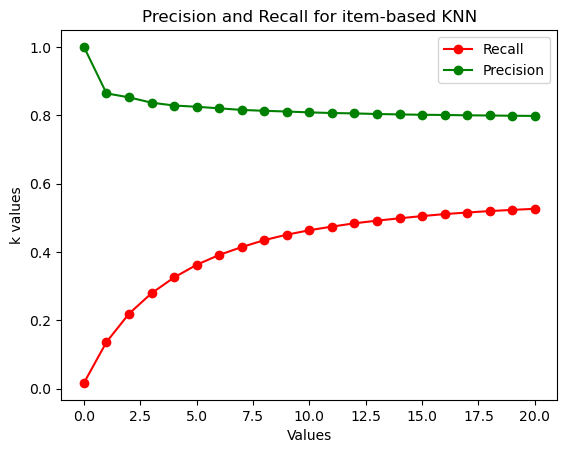

In [37]:
precision = []
recall = []
for k in range(21):
    precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=3.75)
    precision.append(sum(precision for precision in precisions.values()) / len(precisions) )
    recall.append(sum(recall for recall in recalls.values()) / len(recalls) )

plt.plot(range(21), recall, 'ro-', label='Recall')
plt.plot(range(21), precision, 'go-', label='Precision')
plt.xlabel("Values")
plt.ylabel("k values")
plt.legend()
plt.title("Precision and Recall for item-based KNN")
plt.show()

<span style="color:blue"> For item-based KNN model the precision (green line) stay relatively constant at the level of ± 0.8. The Recall values (red line) rise drastically at the beginning and then increases slower with the rise of  k values.

In [38]:
def precision_recall_algo(algo):
    '''Return precision and recall at k metrics for an algorithm.'''    
    
    # Fit algo on training set
    algo.fit(train)
    
    # Predict on test set
    predictions = algo.test(test)
    
    # Compute precision and recall
    precision = []
    recall = []
    for k in range(20):
        precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=3.75)
        precision.append( sum(prec for prec in precisions.values()) / len(precisions) )
        recall.append( sum(rec for rec in recalls.values()) / len(recalls) ) 
    
    return precision, recall

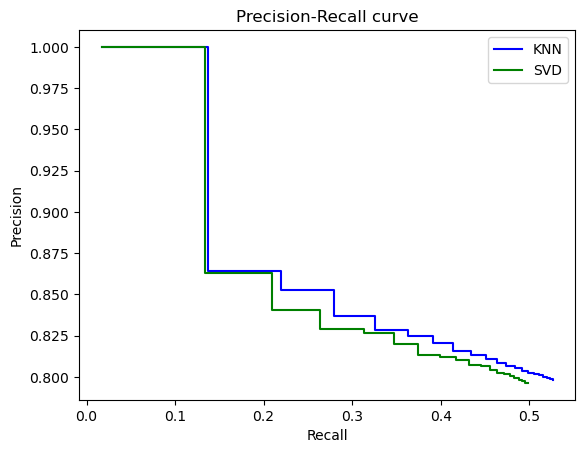

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

In [39]:
# KNN precision and recall
precision_KNN, recall_KNN = precision_recall_algo(knn_means)

# SVD precision and recall
SVD = SVD()
precision_SVD, recall_SVD = precision_recall_algo(SVD)

# Plot
plt.step(recall, precision, color='b', where='post', label ='KNN')
plt.step(recall_SVD, precision_SVD, color='g', where='post', label ='SVD')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision-Recall curve');

<span style="color:blue"> In this plot wee need to look at the area below the lines. Since the area below the KNN model is larger than the area of the SVD model (the blue line is above the green line for almost all of the time), we can conclude that KNN model poerforms better compared to SVD.

Congrats, you are done with the assignment!